# 공공보건의료기관 데이터 분석_0719(화)

In [352]:
import csv
import pandas as pd
path_medical = './data/공공보건의료기관현황.csv'

data = pd.read_csv(path_medical, index_col=0, encoding='euc_kr')
print(data.columns)
data.head()

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [353]:
# 주소에서 시도, 군구 주소 찾기
addr = pd.DataFrame(data['주소'])
print(addr.head())
addr = addr['주소'].apply(lambda v: v.split()[:2])
print(addr.head())
addr = pd.DataFrame(addr.tolist(), columns=('시도','군구'))
print(addr.head())

                             주소
연번                             
1       강원도 춘천시 충열로 142번길 24-16
2              강원도 삼척시 오십천로 418
3           강원도 영월군 영월읍 중앙1로 59
4         강원도 원주시 서원대로 387(개운동)
5   강원도 강릉시 경강로 2007(남문동 164-1)
연번
1    [강원도, 춘천시]
2    [강원도, 삼척시]
3    [강원도, 영월군]
4    [강원도, 원주시]
5    [강원도, 강릉시]
Name: 주소, dtype: object
    시도   군구
0  강원도  춘천시
1  강원도  삼척시
2  강원도  영월군
3  강원도  원주시
4  강원도  강릉시


In [354]:
# '시도' 컬럼에서 고유한 값 찾기 -> 창원시, 경산시, 천안시는 광역시,특별시가 아님
print(addr['시도'].unique())

# 주소 데이터 변경
print(addr[addr['시도'] =='창원시'])
print('----------------------------')
print(addr[addr['시도'] =='경산시'])
print('----------------------------')
print(addr[addr['시도'] =='천안시'])
print('----------------------------')

addr.iloc[27] = ['경상남도','창원시']
addr.iloc[31] = ['경상남도','창원시']
addr.iloc[47] = ['경상북도','경산시']
addr.iloc[209] = ['충청남도','천안시']
addr.iloc[210] = ['충청남도','천안시']

print(addr['시도'].unique())

['강원도' '경기도' '경기' '경남' '창원시' '경상남도' '경상북도' '경산시' '경북' '인천광역시' '대구광역시'
 '전라남도' '대전광역시' '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시'
 '부산특별시' '대전시' '충남' '전남' '충청남도' '울산광역시' '전북' '천안시' '충청북도']
     시도           군구
27  창원시          의창구
31  창원시  마산합포구3.15대로
----------------------------
     시도   군구
47  경산시  경안로
----------------------------
      시도   군구
209  천안시  동남구
210  천안시  동남구
----------------------------
['강원도' '경기도' '경기' '경남' '경상남도' '경상북도' '경북' '인천광역시' '대구광역시' '전라남도' '대전광역시'
 '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시' '부산특별시' '대전시' '충남'
 '전남' '충청남도' '울산광역시' '전북' '충청북도']


In [355]:
# 시도 이름을 표준이름으로 변경
addr_aliases= 	{'경기':'경기도',	'경남':'경상남도',	'경북':'경상북도',	
'충북':'충청북도',	'서울시':'서울특별시',	'부산특별시':'부산광역시',	
'대전시':'대전광역시',	'충남':'충청남도',	'전남':'전라남도',	'전북':'전라북도'}

addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v,v))
print(addr['시도'].unique())

['강원도' '경기도' '경상남도' '경상북도' '인천광역시' '대구광역시' '전라남도' '대전광역시' '광주광역시'
 '제주특별자치도' '부산광역시' '전라북도' '충청북도' '서울특별시' '충청남도' '울산광역시']


In [356]:
# 군구 데이터 확인  ----> 아란13길 수정 필요
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '아란13길' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '제주시' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군'
 '단양군']


In [357]:
# 아란13길 수정
addr[addr['군구'] == '아란13길']
addr.iloc[75] =['제주특별자치도','제주시']

# 확인
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '제주시' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군' '단양군']


행정구역별 공공보건의료기관의 수 구하기

In [358]:
# 시도 , 군구 합친 컬럼 추가
addr['시도군구'] = addr.apply(lambda r : r['시도']+' '+r['군구'], axis=1)
print('● 시도 , 군구 합친 컬럼 추가')
print(addr.head(3))
print()

# count 컬럼 추가
addr['count'] = 0
print('● count 컬럼 추가')
print(addr.head(3))
print()

# 행정구역별 공공보건의료기관의 수 구하기
addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'],as_index=False).count())
print('● 행정구역별 공공보건의료기관의 수 구하기')
print(addr_group.head(3))
print()

# ['시도군구'] 컬럼 인덱스로 설정 (데이터프레임 병합에 사용할 인덱스)
addr_group = addr_group.set_index('시도군구')
print('● [시도군구] 컬럼 인덱스로 설정')
print(addr_group.head(3))
print()

● 시도 , 군구 합친 컬럼 추가
    시도   군구     시도군구
0  강원도  춘천시  강원도 춘천시
1  강원도  삼척시  강원도 삼척시
2  강원도  영월군  강원도 영월군

● count 컬럼 추가
    시도   군구     시도군구  count
0  강원도  춘천시  강원도 춘천시      0
1  강원도  삼척시  강원도 삼척시      0
2  강원도  영월군  강원도 영월군      0

● 행정구역별 공공보건의료기관의 수 구하기
    시도   군구     시도군구  count
0  강원도  강릉시  강원도 강릉시      4
1  강원도  동해시  강원도 동해시      1
2  강원도  삼척시  강원도 삼척시      1

● [시도군구] 컬럼 인덱스로 설정
          시도   군구  count
시도군구                    
강원도 강릉시  강원도  강릉시      4
강원도 동해시  강원도  동해시      1
강원도 삼척시  강원도  삼척시      1



행정구역별 인구수 데이터 준비

In [359]:
# 데이터 불러오기
population = pd.read_excel('./data/행정구역시군구별_성별인구수.xlsx')
print('● 데이터 불러오기----------------------------------------------------------')
print(population.head(2))
print()

# 컬럼 이름 변경
population=population.rename(columns={'행정구역(시군구)별(1)':'시도','행정구역(시군구)별(2)':'군구'})
print('● 컬럼 이름 변경----------------------------------------------------------')
print(population.head(2))
print()
# ['군구'] 컬럼에서 공백 제거
population['군구'] = population['군구'].str.strip()
print('● [군구] 컬럼에서 공백 제거-----------------------------------------------')
print(population['군구'].head(2))
print()
# row_count = population.shape[0] # row 개수 저장
# for element in range(0,row_count):
#     population['군구'][element] = population['군구'][element].strip()

# ['시도'],['군구'] 컬럼 연결 -> ['시도군구'] 컬럼 추가
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'],axis=1)
print('● [시도],[군구] 컬럼 연결 -> [시도군구] 컬럼 추가-------------------------------')
print(population.head(2))
print()

# 행정구역별 인구 데이터 수정(소계 삭제, 인덱스설정)
# - [군구]컬럼에서 '소계' 항목 제거
population = population[population.군구 !='소계']
# [시도군구]컬럼을 인덱스로 설정(컬럼병합용 인덱스)
population = population.set_index('시도군구')
print('● 소계 삭제 / 인덱스설정 --------------------------------------------------------')
print(population.head(2))


● 데이터 불러오기----------------------------------------------------------
  행정구역(시군구)별(1) 행정구역(시군구)별(2)  총인구수 (명)  남자인구수 (명)  여자인구수 (명)
0            전국            소계  51847509   25862863   25984646
1         서울특별시            소계   9733509    4745088    4988421

● 컬럼 이름 변경----------------------------------------------------------
      시도  군구  총인구수 (명)  남자인구수 (명)  여자인구수 (명)
0     전국  소계  51847509   25862863   25984646
1  서울특별시  소계   9733509    4745088    4988421

● [군구] 컬럼에서 공백 제거-----------------------------------------------
0    소계
1    소계
Name: 군구, dtype: object

● [시도],[군구] 컬럼 연결 -> [시도군구] 컬럼 추가-------------------------------
      시도  군구  총인구수 (명)  남자인구수 (명)  여자인구수 (명)      시도군구
0     전국  소계  51847509   25862863   25984646     전국 소계
1  서울특별시  소계   9733509    4745088    4988421  서울특별시 소계

● 소계 삭제 / 인덱스설정 --------------------------------------------------------
              시도   군구  총인구수 (명)  남자인구수 (명)  여자인구수 (명)
시도군구                                                 
서울특별시 종로구  서울특별시  종로구

데이터 프레임 병합

In [360]:
# [ merge 메서드 속성 ]
# DataFrame.merge(right,	how='inner',	left_on=None,	right_on=None,	
# left_index=True,	right_index=True)

# 데이터프레임 병합
addr_population_merge = pd.merge(addr_group, population, how='inner',left_index=True, right_index=True )
print('● 데이터프레임 병합 :addr_group, population(inde)기준 병합)-----------------------------------------')
print(addr_population_merge.head())
print()

# 새로운 데이터프레임 생성
local_medicalcenter_population = addr_population_merge[['시도_x','군구_x','count','총인구수 (명)']]
local_medicalcenter_population = local_medicalcenter_population.rename(columns={'시도_x':'시도', '군구_x':'군구', 'count': '공공의료기관수', '총인구수 (명)':'인구수'})
print('● 새로운 데이터프레임 생성 / 컬럼명 재설정---------------------------------------------------------- ')
print(local_medicalcenter_population.head())
print()

# 인구 대비 공공의료기관 비율 계산 및 컬럼 추가
mc_count =	local_medicalcenter_population['공공의료기관수']
local_population =	local_medicalcenter_population['인구수']
local_medicalcenter_population['인구대비의료기관비율'] = mc_count.div(local_population,	axis=0)	* 100000
print('● 인구 대비 공공의료기관 비율 계산 및 컬럼 추가 ---------------------------------------------------------- ')
print(local_medicalcenter_population.head())

● 데이터프레임 병합 :addr_group, population(inde)기준 병합)-----------------------------------------
        시도_x 군구_x  count 시도_y 군구_y  총인구수 (명)  남자인구수 (명)  여자인구수 (명)
시도군구                                                              
강원도 강릉시  강원도  강릉시      4  강원도  강릉시    213328     105775     107553
강원도 동해시  강원도  동해시      1  강원도  동해시     90417      45782      44635
강원도 삼척시  강원도  삼척시      1  강원도  삼척시     66806      33811      32995
강원도 속초시  강원도  속초시      1  강원도  속초시     81840      40470      41370
강원도 양구군  강원도  양구군      1  강원도  양구군     22526      11937      10589

● 새로운 데이터프레임 생성 / 컬럼명 재설정---------------------------------------------------------- 
          시도   군구  공공의료기관수     인구수
시도군구                              
강원도 강릉시  강원도  강릉시        4  213328
강원도 동해시  강원도  동해시        1   90417
강원도 삼척시  강원도  삼척시        1   66806
강원도 속초시  강원도  속초시        1   81840
강원도 양구군  강원도  양구군        1   22526

● 인구 대비 공공의료기관 비율 계산 및 컬럼 추가 ---------------------------------------------------------- 
          시도   군구  공공

공공보건의료기관 현황 시각화

Text(0.5, 1.0, '인구대비 공공의료기관 비율')

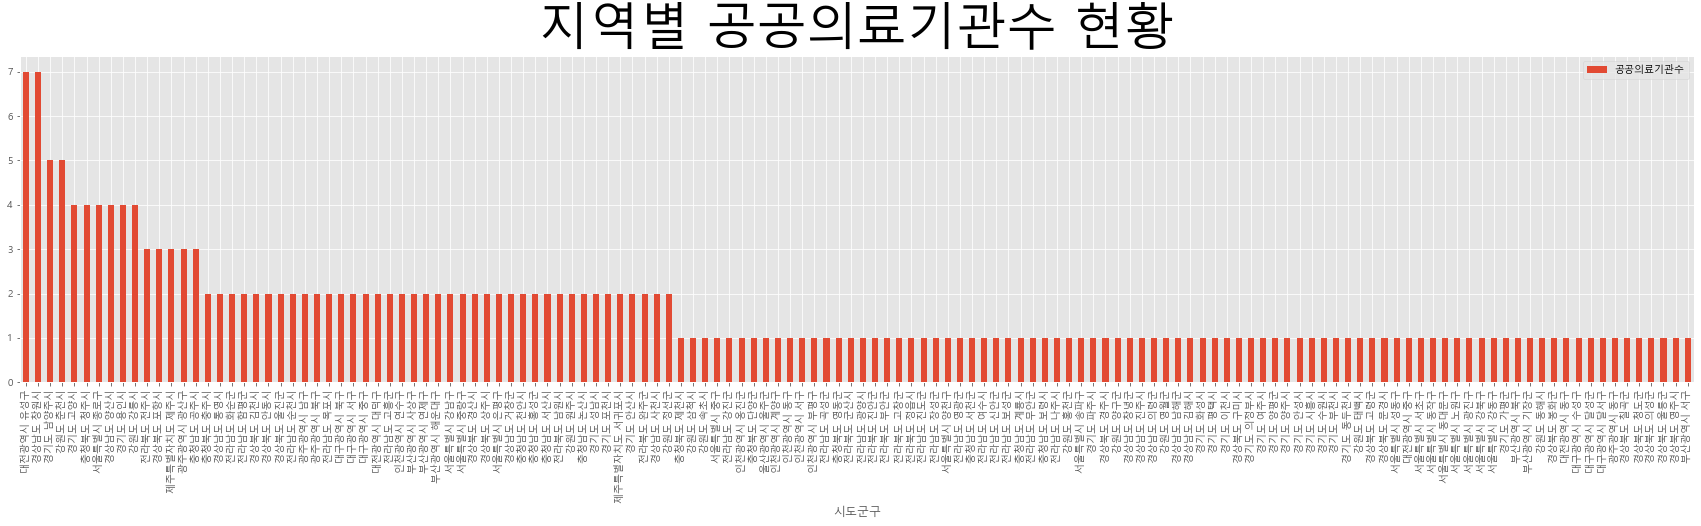

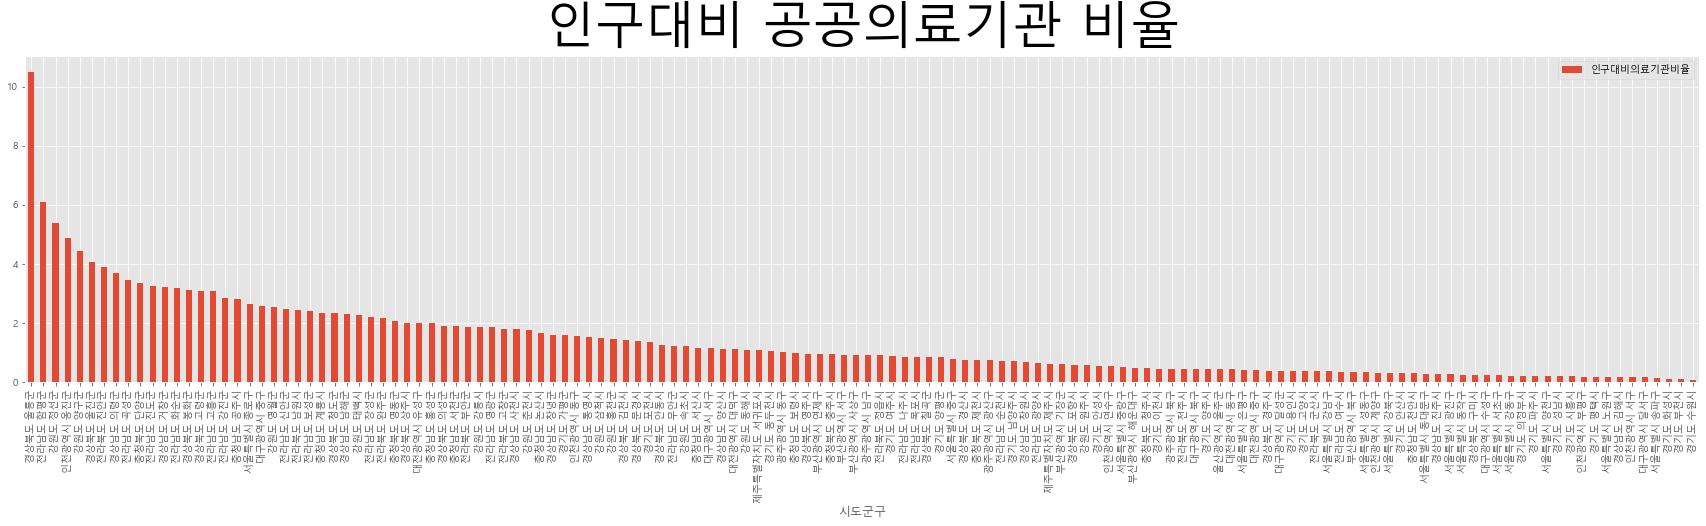

In [361]:
# 그래프 생성 관련 모듈 생성
import	matplotlib.pyplot as plt
import	platform

# 폰트 설정
plt.style.use('ggplot')
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
    
# 지역별 공공의료기관수 현황 (공공의료기관수 : 내림차순)
mc_ratio =	local_medicalcenter_population[['공공의료기관수']]
mc_ratio =	mc_ratio.sort_values('공공의료기관수',	ascending=False)
mc_ratio.plot(kind='bar', rot=90, figsize=(30,6))
plt.title('지역별 공공의료기관수 현황',fontsize=50)

# 인구대비 공공의료기관 비율
plt.style.use('ggplot')
population_mc_rate = local_medicalcenter_population[['인구대비의료기관비율']]
population_mc_rate = population_mc_rate.sort_values('인구대비의료기관비율', ascending=False)
population_mc_rate.plot(kind='bar',	rot=90,	figsize=(30, 6))
plt.title('인구대비 공공의료기관 비율',fontsize=50)
